In [84]:
##Importing libraries
import pandas as pd
import requests
import pickle
import docx2txt
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
from wordcloud import WordCloud
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from alive_progress import alive_bar
pd.set_option("display.max_rows", None, "display.max_columns", None)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.pairwise import cosine_similarity




In [11]:
#getting the clean data from cleaning notebook.
data_clean = pd.DataFrame()
df_resume = pd.DataFrame()
data_clean = pd.read_pickle('clean_data.pkl')
df_resume = pd.read_pickle('df_resume.pkl')

In [32]:
## removing stopwords in English
stoplist = stopwords.words('english')
stoplist = set(stoplist)
def removing_stopwords(text):

    # repr() function actually gives the precise information about the string
    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist]
    # Convert list of tokens_without_stopwords to String type.
    words_string = ' '.join(No_StopWords)  
    return words_string
stopwords = lambda x: removing_stopwords(x)

In [16]:
data_clean_stopwords = pd.DataFrame(data_clean.jobdescription.apply(stopwords))
data_clean_stopwords

jobdescription
0      `` looking selenium engineers must solid java ...
1      'the university chicago rapidly growing securi...
2      `` galaxe solutionsevery day solutions affect ...
3      'java developerfull time direct hire bo ling b...
4      'midtown based high tech firm immediate need i...
5      'we looking senior sap fico architect join us ...
6      'network engineer job description network engi...
7      `` bluebeam looking talented sr web developers...
8      `` fulltime position javascript developer fina...
9      `` summaryour client leading provider online v...
10     `` job description senior member team responsi...
11     'must skills unix iam identity access manageme...
12     'vanderhouwen jobs may like find please join t...
13     'genesis currently seeking sales engineer stee...
14     'vanderhouwen jobs may like find please join t...
15     'windows systems administrator windows systems...
16     'location atlanta gajob title test lead manage...
17     'vanderhouwen jobs may like find please join t...
18     `` genesis actively seeking messaging administ...
19     'our client healthcare software industry seeki...
20     `` genesis looking business analyst long term ...
21     'great opportunity driven energetic sales prof...
22     `` client world premier voice electronic inter...
23     'genesis seeking quality consultant four month...
24     'vanderhouwen jobs may like find please join t...
25     `` want chance directly improve customer exper...
26     'please join talent network joining talent net...
27     'selenium tester salt lake city ut & phoenix a...
28     'turn berry solutions search security engineer...
29     'please join talent network joining talent net...
30     'our client seeking software developer join te...
31     `` genesis incredible opportunity business dev...
32     `` client cloud based education services compa...
33     'description monitor update integrated project...
34     'vanderhouwen jobs may like find please join t...
35     'please join talent network joining talent net...
36     'genesis seeking mxu construction coordinators...
37     'hi established etouch systems technology serv...
38     'please join talent network joining talent net...
39     'centizen inc global agile solutions consultin...
40     'project manager contract post ion located ton...
41     `` administering informatica environment apply...
42     'do want help build highly personalized homepa...
43     'genesis seeking sr business data analyst six ...
44     'clinical site monitor requirement # recruiter...
45     'job summary person position provides quality ...
46     'system support administrator seeking part tim...
47     'job req # job description java lead ecommerce...
48     'clearance must eligible obtain top secret cle...
49     'clearance active secret required strong prefe...
50     '+ years information technology management exp...
51     `` company overview creating value bringing to...
52     'please join talent network joining talent net...
53     `` genesis incredible opportunity business dev...
54     `` help invent next generation ecommerce integ...
55     `` description client open software frameworks...
56     'genesis g associates program seeking qualifie...
57     'global financial systems gfs looking driven r...
58     'required skills one six nine years experience...
59     'wind owns san security virtual environment dr...
60     'position software engineer algorithm duration...
61     `` please join talent network joining talent n...
62     'duties using sap apo provide materials schedu...
63     'position technical infrastructure project man...
64     'please join talent network joining talent net...
65     'we need project coordinator person handle pro...
66     'primary skills systems admin devops scripting...
67     'we seeking oracle business systems analyst di...
68     'vanderhouwen jobs may like find liaison commu...
69     'keywords required skills scientific software

In [146]:
pickle.dump(data_clean_stopwords, open("data_clean_stopwords.pkl", "wb"))

In [52]:
wc = WordCloud( background_color="white", colormap="Dark2",
               max_font_size=300, random_state=42)
def wordcloud(data):
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

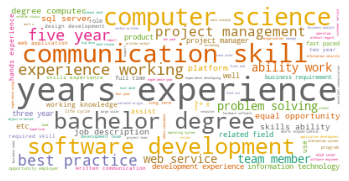

In [56]:
##showing the most used words in the dataset. 
wordcloud(data_clean_stopwords['jobdescription'])

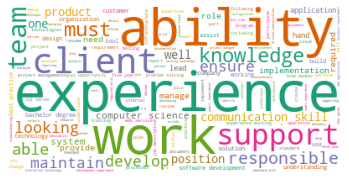

In [55]:
##most used words including stopwords. 
#However, wordcloud has a build-in STOPWORDS list. 
wordcloud(data_clean['jobdescription'])

In [33]:
df_resume_stopwords = pd.DataFrame(df_resume.resume.apply(stopwords))
df_resume_stopwords

resume
0  'maria lisa email phone five five career summa...

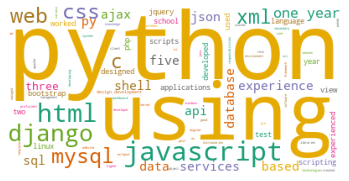

In [54]:
#the most used words of the resume
wordcloud(df_resume_stopwords.resume)

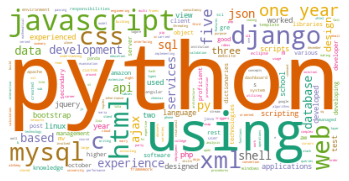

In [57]:
wordcloud(df_resume.resume)

In [115]:
##Let's see how long each job description is. 
for i in range(0, len(data_clean)):
    data_clean['length'].iloc[i] = len(data_clean.jobdescription.iloc[i].split())

In [116]:
for i in range(0, len(data_clean_stopwords)):
    data_clean_stopwords['length'].iloc[i] = len(data_clean_stopwords.jobdescription.iloc[i].split())

In [145]:
For Bert
#for i in range(0, len(data_clean_stopwords)):
    #if len(data_clean.jobdescription.iloc[i].split()) < 512:
       # print (i)

0
1
2
3
4
5
6
7
8
10
12
13
14
16
17
19
21
22
23
24
26
27
28
29
30
32
33
34
35
37
38
39
41
42
44
45
46
47
48
50
51
52
54
55
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
82
83
84
85
86
87
88
90
92
93
94
95
97
98
99
100
102
103
104
105
106
107
108
109
110
112
113
114
116
117
118
119
120
121
124
125
126
128
129
131
133
134
137
139
140
141
143
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
165
166
167
169
170
171
172
173
174
175
176
177
178
180
181
182
184
185
186
187
189
190
191
192
193
194
195
196
197
199
200
203
205
206
207
208
210
211
212
213
215
217
218
219
221
222
225
226
227
228
229
232
234
235
236
237
238
239
240
241
242
243
244
246
248
249
251
252
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
273
275
276
277
278
279
280
281
282
283
284
285
286
289
290
291
295
297
299
300
302
305
308
309
313
314
316
318
319
322
324
325
329
330
331
334
337
338
339
341
342
343
344
346
347
348
349
350
352
354
355
356
357
358
359

3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3127
3128
3130
3131
3132
3133
3135
3136
3137
3138
3139
3140
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3158
3159
3160
3161
3162
3163
3164
3165
3168
3172
3173
3174
3175
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3193
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3218
3219
3220
3221
3222
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3242
3243
3245
3246
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3263
3264
3265
3266
3269
3271
3272
3273
3274
3275
3276
3277
3278
3279
3281
3282
3283
3284
3286
3287
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3307
3308
3309
3312
3313
3314


5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5490
5491
5492
5493
5494
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5507
5508
5509
5510
5511
5512
5513
5515
5516
5517
5518
5519
5520
5523
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5537
5538
5539
5540
5541
5542
5543
5544
5547
5548
5549
5551
5552
5553
5554
5555
5556
5557
5558
5560
5561
5562
5563
5564
5566
5567
5569
5570
5571
5572
5573
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5590
5591
5593
5594
5595
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5611
5613
5615
5617
5619
5621
5622
5624
5626
5627
5629
5630
5631
5633
5634
5635
5636
5637
5642
5643
5644
5645
5646
5648
5649
5650
5651
5652
5653
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5666
5667
5668
5670
5671
5672
5673
5674
5675
5677
5678
5679
5680
5682
5683
5684
5686
5687
5688
5692
5694
5695
5696
5697
5698
5699
5700
5701
5702
5704
5705
5707
5709
5711
5712
5713
5715
5717
5720
5722
5723
5724
5725
5727
5728


7974
7975
7976
7977
7978
7979
7980
7981
7982
7984
7985
7986
7987
7988
7989
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8008
8009
8010
8011
8012
8013
8015
8016
8018
8019
8020
8021
8023
8024
8025
8026
8027
8028
8030
8032
8033
8035
8036
8037
8039
8040
8041
8042
8043
8044
8045
8046
8047
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8085
8086
8087
8088
8090
8091
8093
8094
8095
8096
8097
8098
8099
8100
8101
8104
8106
8107
8108
8109
8111
8112
8113
8114
8115
8116
8118
8119
8120
8121
8122
8123
8125
8126
8128
8129
8130
8132
8133
8134
8135
8136
8137
8140
8143
8144
8145
8146
8147
8148
8150
8151
8152
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8167
8168
8169
8170
8171
8172
8173
8174
8175
8177
8178
8179
8181
8182
8183
8184
8185
8186
8187
8188
8189
8191
8192
8193
8194
8195
8196
8197
8198
8200
8201
8202
8203
8206
8207
8208
8209
8210
8212


10976
10977
10978
10979
10981
10983
10984
10985
10986
10987
10989
10990
10992
10993
10994
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11027
11028
11029
11030
11031
11032
11033
11034
11037
11038
11039
11040
11041
11042
11044
11045
11046
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11076
11077
11078
11079
11080
11081
11082
11083
11084
11086
11087
11088
11089
11090
11091
11093
11094
11095
11096
11098
11099
11101
11102
11103
11104
11105
11106
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11143
11144
11145
11146
11148
11150
11151
11152
11153
11154
11155
11156
11157
11158
11159
11162
11163
11164
11165
11166
1116

13477
13478
13479
13480
13481
13483
13484
13485
13486
13487
13488
13489
13491
13492
13493
13494
13495
13496
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13527
13528
13529
13530
13532
13533
13535
13538
13541
13542
13543
13545
13546
13547
13548
13549
13550
13551
13552
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13589
13590
13591
13592
13593
13595
13596
13597
13598
13600
13601
13602
13603
13604
13605
13606
13608
13609
13610
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13631
13632
13633
13634
13635
13636
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
1366

16175
16176
16177
16178
16179
16180
16181
16183
16184
16186
16187
16188
16189
16190
16191
16194
16195
16196
16197
16198
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16271
16272
16273
16274
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16287
16288
16289
16290
16291
16292
16293
16295
16296
16297
16298
16299
16301
16302
16303
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16318
16319
16320
16321
16322
16323
16324
16325
16326
16328
16330
16331
16332
16333
16334
16335
16336
16337
16338
16341
16342
16343
16344
16345
16347
16348
16349
16350
16351
16352
16353
16354
16356
16357
16358
16359
16360
1636

18390
18391
18392
18393
18394
18395
18396
18397
18399
18400
18402
18403
18404
18405
18406
18407
18408
18409
18410
18412
18413
18414
18415
18416
18417
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18446
18447
18448
18449
18450
18451
18452
18453
18454
18457
18458
18459
18460
18461
18462
18464
18465
18467
18468
18469
18471
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18490
18492
18493
18494
18495
18496
18497
18499
18500
18502
18504
18505
18507
18508
18510
18512
18515
18517
18518
18520
18522
18523
18524
18525
18527
18528
18529
18530
18532
18534
18535
18536
18537
18538
18541
18542
18543
18544
18546
18547
18549
18550
18551
18554
18555
18557
18558
18559
18560
18561
18562
18563
18565
18566
18567
18568
18569
18570
18571
18573
18574
18575
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
1859

20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20788
20789
20790
20792
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20812
20814
20815
20816
20818
20819
20820
20821
20822
20823
20824
20825
20827
20828
20829
20830
20832
20833
20834
20835
20837
20838
20839
20840
20841
20842
20843
20844
20845
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20871
20872
20873
20875
20877
20879
20880
20881
20882
20883
20884
20885
20886
20887
20889
20890
20891
20892
20893
20894
20895
20896
20898
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
2091

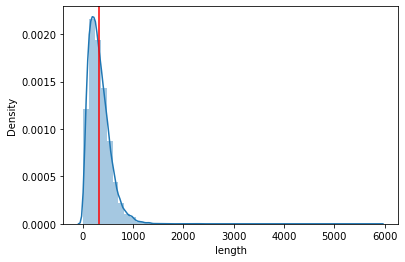

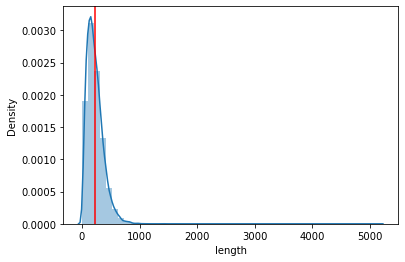

In [117]:
##how is the distribution of the job description counts
sns.distplot(data_clean['length'])
plt.axvline(x=data_clean['length'].mean(),
            color='red')
plt.show()
sns.distplot(data_clean_stopwords['length'])
plt.axvline(x=data_clean_stopwords['length'].mean(),
            color='red')
plt.show()


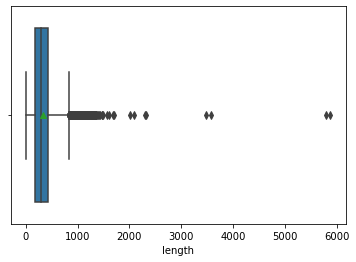

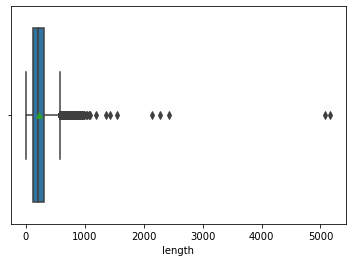

In [118]:

sns.boxplot(data_clean['length'], showmeans=True)
plt.show()
sns.boxplot(data_clean_stopwords['length'], showmeans=True)
plt.show()

In [131]:
##Let's see how long each job description is. 
for i in range(0, len(data_clean)):
    try: 
        data_clean['unique_counts'].iloc[i] = pd.Series(data_clean['jobdescription'][i].split()).nunique()
    except:
        continue

In [137]:
for i in range(0, len(data_clean)):
    try: 
        data_clean_stopwords['unique_counts'].iloc[i] = pd.Series(data_clean_stopwords['jobdescription'][i].split()).nunique()
    except:
        continue

In [135]:
data_clean_stopwords['unique_counts'] = pd.Series(data_clean_stopwords['jobdescription'][0].split()).nunique()

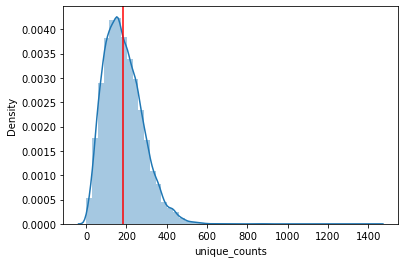

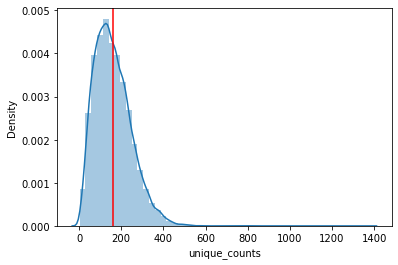

In [138]:
sns.distplot(data_clean['unique_counts'])
plt.axvline(x=data_clean['unique_counts'].mean(),
            color='red')
plt.show()
sns.distplot(data_clean_stopwords['unique_counts'])
plt.axvline(x=data_clean_stopwords['unique_counts'].mean(),
            color='red')
plt.show()


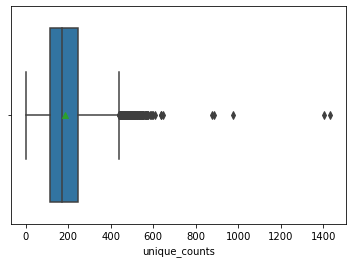

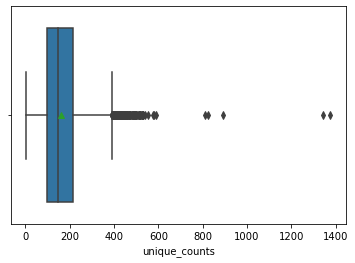

In [140]:
sns.boxplot(data_clean['unique_counts'], showmeans=True)
plt.show()
sns.boxplot(data_clean_stopwords['unique_counts'], showmeans=True)
plt.show()

### In this part, I am checking some interesting most used words and see what is the context. This part pivoted the way I cleaned my data. I added the word count < 5, then run through the wordninja split. 

In [141]:
most_used_word_clean = pd.Series(' '.join(data_clean_stopwords['jobdescription']).split()).value_counts()[:500]

In [142]:
most_used_word_clean

experience          89594
business            38190
work                36007
development         35280
skills              34373
data                30169
management          29555
team                29370
years               29280
technical           26634
software            25763
design              25367
project             24456
support             24449
systems             24397
knowledge           24155
'                   22631
ability             21489
solutions           20753
requirements        19684
required            19002
strong              18698
services            18617
working             17581
technology          17500
client              17003
security            16860
including           16244
must                15472
application         15437
system              14869
new                 14784
applications        14665
information         14524
environment         14516
&                   14395
+                   14383
web                 14333
position    

In [43]:
pd.DataFrame(re.findall('[a-zA-Z]+\su\s[a-zA-Z]+', ' '.join(data_clean_stopwords['jobdescription']))).value_counts()

work u please                       331
work u encouraged                   247
work u sponsorships                 172
companies u may                      95
across u one                         93
eeo u citizenship                    92
including u government               64
solutions u federal                  64
work u without                       57
jersey u cognizant                   46
benefits u k                         43
th u congress                        40
providers u combine                  33
must u citizen                       22
leading u business                   21
note u citizens                      17
candidates u citizens                16
sector u citizenship                 14
requires u citizenship               14
services u innovative                13
permanent u citizens                 12
engaging u consumer                  11
buyers u recognized                  11
obtain u government                  10
requirements u citizenship           10


In [45]:
re.findall('[a-zA-Z]+\sx\s[a-zA-Z]+', ' '.join(data_clean_stopwords['jobdescription']))

['role x highly',
 'call x key',
 'responsible x supportwork',
 'four x development',
 'critical x production',
 'call x key',
 'administration x production',
 'experience x production',
 'employee x platform',
 'ne x responsible',
 'os x linux',
 'ef x code',
 'elements x certificates',
 'view x netbrain',
 'citri x vmware',
 'six x ten',
 'nine x higher',
 'os x environments',
 'eight x experience',
 'v x experience',
 'v x database',
 'eight x proficient',
 'gs x vcenter',
 'delphi x plus',
 'point x operations',
 'lene x ks',
 'nine x good',
 'call x key',
 'technologies x enterprise',
 'four x sql',
 'four x reporting',
 'four x reporting',
 'monitor x service',
 'working x support',
 'practices x service',
 'citri x vmware',
 'ph x email',
 'cortex x based',
 'cortex x based',
 'cortex x based',
 'thread x usb',
 'thread x plus',
 'participate x call',
 'participate x call',
 'cortex x based',
 'direct x fax',
 'arm x bsp',
 'arm x linux',
 'infrastructure x platform',
 'four x i